<a href="https://colab.research.google.com/github/Vagarh/IUdigital/blob/main/ML_Prediccion_Protein_Family.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unidad 1. Analítica predictiva
## Evidencia de Aprendizaje 1. Analítica predictiva y planteamiento de problemas

Objetivo:
Definir e implementar un problema que parta de una necesidad de alguna entidad, industria o situación de la vida real que pueda ser solucionado por medio de analítica de datos.

Industria del Negocio: Farmaceutica,Ciencias Biologicas, Medicina..

# Contexto del Negocio:

[Bioinformatics Industry Overview](<a href='https://www.mordorintelligence.com/industry-reports/global-bioinformatics-market-industry'>
<img
alt='Bioinformatics Market Size & Share Analysis - Growth Trends & Forecasts (2023 - 2028)'
src='https://s3.mordorintelligence.com/global-bioinformatics-market-industry/1668144804432_global-bioinformatics-market-industry_Bioinformatics_Market_-_Growth_Rate_by_Region.png?embed=true'>
</a>
<br/>
Mordor Intelligence - Bioinformatics Market Size & Share Analysis - Growth Trends & Forecasts (2023 - 2028))

Los objetivos principales de la Bioinformática son (1) gestionar los datos de manera que permita un fácil acceso a la información existente y la incorporación de nuevas entradas a medida que se produzcan; (2) desarrollar herramientas tecnológicas que ayuden a analizar datos biológicos; y (3) utilizar estas herramientas para analizar los datos e interpretar los resultados desde una perspectiva biológica.

Industria del Negocio: Farmaceutica,Ciencias Biologicas, Medicina..

Problema del Negocio: Clasificar una familia de proteinas a partir de una secuencia de aminiacidos a traves de un modelo de ML y comparar sus resutlados con lo motores de busqueda existentes BLAST.




# 1.Preparacion del entorno de trabajo.

In [ ]:
## Cargando las librerias

## Manupulacion
import pandas as pd
import numpy as np

## Vizualizacion
from matplotlib import pyplot as plt
import seaborn as sns

## Machine Learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## --------------

# Import Datasets
df_seq = pd.read_csv('/content/pdb_data_seq.csv')
df_char = pd.read_csv('/content/pdb_data_no_dups.csv')

print('Datasets have been loaded...')

Datasets have been loaded...


# 2.Procesamiento de datos y filtrado

In [ ]:
# 2). ----- FILTRAR Y PROCESAS EL DATA SETT ------

# Filtrar solo las proteinas
protein_char = df_char[df_char.macromoleculeType == 'Protein']
protein_seq = df_seq[df_seq.macromoleculeType == 'Protein']


EL analisis comprende el uso de dos data sett denominados "PROTEIN_CHAR" Y "PROTEIN_SEP".Con los datos cargados en dos dataframes separados de pandas, es necesario realizar un filtro, una proyección y una unión para obtener los datos juntos, la libreria pandas ofrece una forma de realizar estos comandos similares a SQL.

# Protein_Char

In [ ]:
protein_char.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
5,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
7,103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0
8,103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0


In [ ]:
protein_char.describe(include="all")

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
count,127798,127797,127798,127798,127798.000000,117008.000000,1.277980e+05,87667,88638.000000,114341.000000,114362.000000,108296,95902.000000,105931.000000
unique,127387,4468,29,1,NaN,NaN,NaN,526,NaN,NaN,NaN,84469,NaN,NaN
top,1UJQ,HYDROLASE,X-RAY DIFFRACTION,Protein,NaN,NaN,NaN,"VAPOR DIFFUSION, HANGING DROP",NaN,NaN,NaN,pH 7.5,NaN,NaN
freq,4,20425,115438,127798,NaN,NaN,NaN,48893,NaN,NaN,NaN,346,NaN,NaN
mean,NaN,NaN,NaN,NaN,721.049046,2.208678,8.955848e+04,NaN,291.000731,2.652620,51.113914,NaN,6.786939,2009.044746
std,NaN,NaN,NaN,NaN,1741.791584,1.339638,4.690485e+05,NaN,8.764264,0.687323,10.011235,NaN,1.307179,8.521400
min,NaN,NaN,NaN,NaN,3.000000,0.480000,4.535500e+02,NaN,4.000000,0.000000,0.000000,NaN,0.000000,201.000000
25%,NaN,NaN,NaN,NaN,237.000000,1.780000,2.672429e+04,NaN,290.000000,2.210000,44.160000,NaN,6.000000,2005.000000
50%,NaN,NaN,NaN,NaN,416.000000,2.040000,4.706000e+04,NaN,293.000000,2.480000,50.200000,NaN,7.000000,2010.000000
75%,NaN,NaN,NaN,NaN,800.000000,2.490000,9.102404e+04,NaN,295.000000,2.890000,57.320000,NaN,7.500000,2014.000000


In [ ]:
protein_char.columns

Index(['structureId', 'classification', 'experimentalTechnique',
       'macromoleculeType', 'residueCount', 'resolution',
       'structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'pdbxDetails', 'phValue', 'publicationYear'],
      dtype='object')

In [ ]:
protein_char.dtypes

structureId                  object
classification               object
experimentalTechnique        object
macromoleculeType            object
residueCount                  int64
resolution                  float64
structureMolecularWeight    float64
crystallizationMethod        object
crystallizationTempK        float64
densityMatthews             float64
densityPercentSol           float64
pdbxDetails                  object
phValue                     float64
publicationYear             float64
dtype: object

In [ ]:
protein_char.isnull().sum()

structureId                     0
classification                  1
experimentalTechnique           0
macromoleculeType               0
residueCount                    0
resolution                  10790
structureMolecularWeight        0
crystallizationMethod       40131
crystallizationTempK        39160
densityMatthews             13457
densityPercentSol           13436
pdbxDetails                 19502
phValue                     31896
publicationYear             21867
dtype: int64

In [ ]:
# Seleccionando variables a unir en los dos data set
protein_char = protein_char[['structureId','classification','residueCount', 'resolution',
       'structureMolecularWeight','crystallizationTempK', 'densityMatthews', 'densityPercentSol', 'phValue']]
protein_seq = protein_seq[['structureId','sequence']]
protein_seq.head()

,structureId,sequence
4,101M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
7,102L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
8,102M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
11,103L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
12,103M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


In [ ]:
protein_char.head()

,structureId,classification,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue
2,101M,OXYGEN TRANSPORT,154,2.07,18112.80,NaN,3.09,60.20,9.0
4,102L,HYDROLASE(O-GLYCOSYL),165,1.74,18926.61,NaN,2.75,55.28,NaN
5,102M,OXYGEN TRANSPORT,154,1.84,18010.64,NaN,3.09,60.20,9.0
7,103L,HYDROLASE(O-GLYCOSYL),167,1.90,19092.72,NaN,2.70,54.46,NaN
8,103M,OXYGEN TRANSPORT,154,2.07,18093.78,NaN,3.09,60.30,9.0


In [ ]:
# Uniendo ambos data set en un nuevo mas esturcutrado
model_f = protein_char.set_index('structureId').join(protein_seq.set_index('structureId'))
model_f.head()

,classification,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,sequence
structureId,,,,,,,,,
101M,OXYGEN TRANSPORT,154,2.07,18112.80,NaN,3.09,60.20,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
102L,HYDROLASE(O-GLYCOSYL),165,1.74,18926.61,NaN,2.75,55.28,NaN,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
102M,OXYGEN TRANSPORT,154,1.84,18010.64,NaN,3.09,60.20,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
103L,HYDROLASE(O-GLYCOSYL),167,1.90,19092.72,NaN,2.70,54.46,NaN,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
103M,OXYGEN TRANSPORT,154,2.07,18093.78,NaN,3.09,60.30,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


In [ ]:
model_f.describe(include="all")

,classification,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,sequence
count,346324,346325.000000,330232.000000,3.463250e+05,243934.000000,307481.000000,307615.000000,259130.000000,346322
unique,4468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89083
top,HYDROLASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PIVQNLQGQMVHQAISPRTLNAWVKVVEEKAFSPEVIPMFSALSEG...
freq,46336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2580
mean,NaN,4708.536765,2.716206,5.516918e+05,291.243141,2.760855,52.817512,6.801273,NaN
std,NaN,26484.160063,3.083736,3.129940e+06,8.498793,0.738698,10.135556,1.344769,NaN
min,NaN,3.000000,0.480000,4.535500e+02,4.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,398.000000,1.900000,4.541398e+04,291.000000,2.280000,45.820000,6.000000,NaN
50%,NaN,856.000000,2.300000,9.703276e+04,293.000000,2.570000,52.000000,7.000000,NaN
75%,NaN,1976.000000,2.800000,2.253119e+05,295.000000,3.030000,59.380000,7.500000,NaN


In [ ]:
model_f.dtypes

classification               object
residueCount                  int64
resolution                  float64
structureMolecularWeight    float64
crystallizationTempK        float64
densityMatthews             float64
densityPercentSol           float64
phValue                     float64
sequence                     object
dtype: object

In [ ]:
model_f.shape

(346325, 9)

In [ ]:
print('%d es el numero de finlas unidaas (join) en ambos data set' %model_f.shape[0])

346325 es el numero de finlas unidaas (join) en ambos data set


In [ ]:
# Validando datos nulos
model_f.isnull().sum()

classification                   1
residueCount                     0
resolution                   16093
structureMolecularWeight         0
crystallizationTempK        102391
densityMatthews              38844
densityPercentSol            38710
phValue                      87195
sequence                         3
dtype: int64

In [ ]:
# Drop rows con valores perdidos
model_f = model_f.dropna()
print('%d es el numero de proteinas que tienen una clasificacion de familia y secuencia' %model_f.shape[0])

214106 es el numero de proteinas que tienen una clasificacion de familia y secuencia


In [ ]:
# Look at classification type counts
counts = model_f.classification.value_counts()
print(counts)


HYDROLASE                               29726
TRANSFERASE                             24338
OXIDOREDUCTASE                          22578
IMMUNE SYSTEM                           11087
HYDROLASE/HYDROLASE INHIBITOR            9569
                                        ...  
DYE-BINDING PROTEIN                         1
CHAPERONE REGULATOR                         1
pyridoxal phosphate binding                 1
IMMUNE SYSTEM, LIPID BINDING PROTEIN        1
lipid transport/activator                   1
Name: classification, Length: 2458, dtype: int64


<ipython-input-61-2baad1cf75d6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(counts, hist = False, color = 'purple')


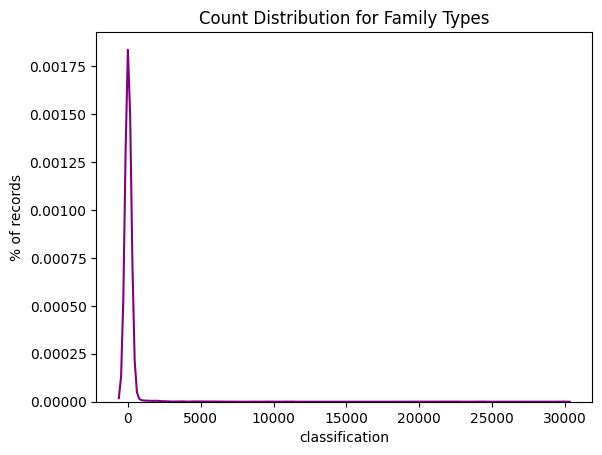

In [ ]:
#plot counts
plt.figure()
sns.distplot(counts, hist = False, color = 'purple')
plt.title('Count Distribution for Family Types')
plt.ylabel('% of records')
plt.show()

In [ ]:
# Get classification types where counts are over 1000
types = np.asarray(counts[(counts > 1000)].index)
print(len(types))
# Filter dataset's records for classification types > 1000
data = model_f[model_f.classification.isin(types)]
data = data.drop_duplicates(subset=["classification","sequence"])  # leaving more rows results in duplciates / index related?

print(types)
print('%d is the number of records in the final filtered dataset' %data.shape[0])

32
['HYDROLASE' 'TRANSFERASE' 'OXIDOREDUCTASE' 'IMMUNE SYSTEM'
 'HYDROLASE/HYDROLASE INHIBITOR' 'LYASE' 'TRANSCRIPTION'
 'TRANSPORT PROTEIN' 'ISOMERASE' 'VIRAL PROTEIN' 'SIGNALING PROTEIN'
 'LIGASE' 'PROTEIN BINDING' 'STRUCTURAL GENOMICS, UNKNOWN FUNCTION'
 'TRANSFERASE/TRANSFERASE INHIBITOR' 'MEMBRANE PROTEIN'
 'SUGAR BINDING PROTEIN' 'UNKNOWN FUNCTION' 'DNA BINDING PROTEIN'
 'CHAPERONE' 'STRUCTURAL PROTEIN' 'METAL BINDING PROTEIN' 'CELL ADHESION'
 'ELECTRON TRANSPORT' 'PROTEIN TRANSPORT'
 'OXIDOREDUCTASE/OXIDOREDUCTASE INHIBITOR' 'TOXIN' 'RNA BINDING PROTEIN'
 'CELL CYCLE' 'PHOTOSYNTHESIS' 'GENE REGULATION' 'DE NOVO PROTEIN']
46422 is the number of records in the final filtered dataset


In [ ]:
data = data.drop_duplicates(subset=["classification","sequence"])
data.shape

(46422, 9)

3.Modelacion ML

In [ ]:
## Could add n-grams
## https://stackoverflow.com/questions/18658106/quick-implementation-of-character-n-grams-using-python
# jump_size !=1 -> less overlap in n-grams.
def char_grams(text,n=3,jump_size=2):
    return [text[i:i+n] for i in range(0,len(text)-n+1,jump_size)]

In [ ]:
data.head(3).sequence.apply(char_grams)

structureId
1A4S    [AQL, LVD, DSM, MPS, SAS, STG, GSV, VVV, VTD, ...
1A6Q    [MGA, AFL, LDK, KPK, KME, EKH, HNA, AQG, GQG, ...
1A72    [STA, AGK, KVI, IKC, CKA, AAV, VLW, WEE, EKK, ...
Name: sequence, dtype: object

In [ ]:
data["3mers"] = data.sequence.apply(char_grams)

In [ ]:
data.tail()

,classification,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,sequence,3mers
structureId,,,,,,,,,,
6FFL,SUGAR BINDING PROTEIN,388,1.71,44992.17,291.0,2.59,53.00,5.5,EDVRIQIWHQMIYGHRQVLAEALEKFEKENPGITVQATYRETEELR...,"[EDV, VRI, IQI, IWH, HQM, MIY, YGH, HRQ, QVL, ..."
6FG7,PROTEIN BINDING,500,1.90,56392.64,298.0,3.39,63.68,4.0,MKEIGSKPRKLLPLCFIIFLCFCSSVMAADEDDIRCLRGLKASLTD...,"[MKE, EIG, GSK, KPR, RKL, LLP, PLC, CFI, IIF, ..."
6FG8,PROTEIN BINDING,506,1.25,58478.36,298.0,1.86,33.78,5.5,MTRLTVLALLAGLLASSRAGSSMASANLEGDALHTLRVTLVDPNNV...,"[MTR, RLT, TVL, LAL, LLA, AGL, LLA, ASS, SRA, ..."
6FG8,PROTEIN BINDING,506,1.25,58478.36,298.0,1.86,33.78,5.5,MKKIFITLLWLLFISSFLCSSSSAEDDVLCLQGLKNSLIDPSSRLS...,"[MKK, KIF, FIT, TLL, LWL, LLF, FIS, SSF, FLC, ..."
6FIF,PROTEIN BINDING,837,2.54,93918.31,298.0,3.32,62.96,4.0,MKTFSSFFLSVTTLFFFSFFSLSFQASPSQSLYREIHQLISFKDVL...,"[MKT, TFS, SSF, FFL, LSV, VTT, TLF, FFF, FSF, ..."


In [ ]:
data.to_csv("protein_classification_46k_ngrams.csv.gz",compression="gzip")

In [ ]:
# 3). ----- Train Test Split -----

# Split Data
X_train, X_test,y_train,y_test = train_test_split(data['sequence'], data['classification'], test_size = 0.2, random_state = 1)

# Create a Count Vectorizer to gather the unique elements in sequence
vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (4,4))

# Fit and Transform CountVectorizer
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

#Print a few of the features
print(vect.get_feature_names()[-20:])

AttributeError: ignored

## Ml Modelos usanso sckitlear

In [ ]:
# 4). ------ Machine Learning Models ------

# Make a prediction dictionary to store accuracys
prediction = dict()

# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df, y_train)
NB_pred = model.predict(X_test_df)
prediction["MultinomialNB"] = accuracy_score(NB_pred, y_test)
print( prediction['MultinomialNB'])

0.5542272482498654


In [ ]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train_df,y_train)
ADA_pred = model.predict(X_test_df)
prediction["Adaboost"] = accuracy_score(ADA_pred , y_test)
print(prediction["Adaboost"])

0.2555735056542811


# Metricas

<Axes: >

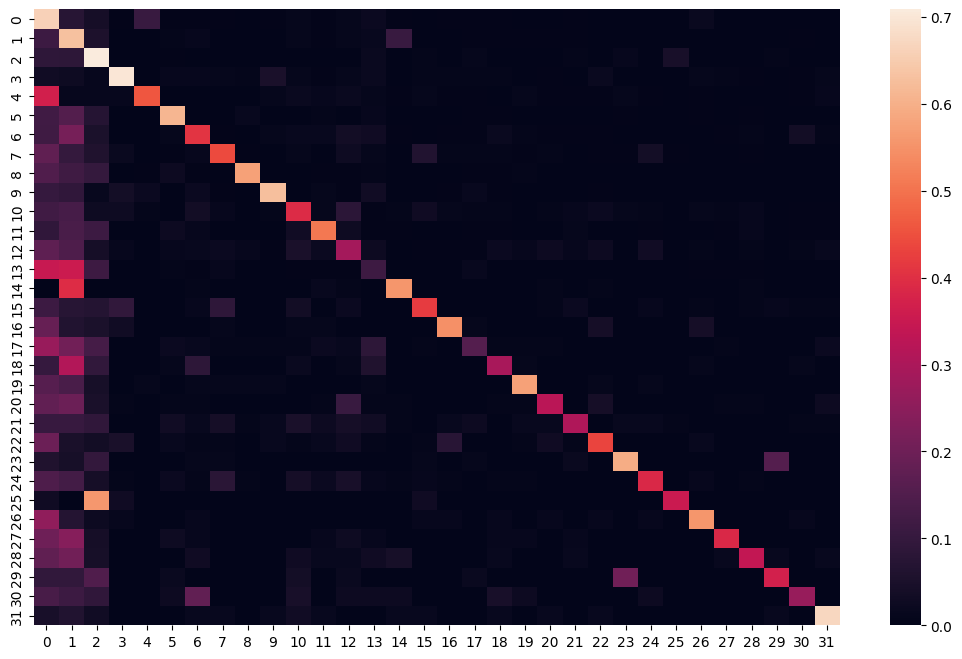

In [ ]:
# 5). ----- Plot Confusion Matrix for NB -----

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, NB_pred, labels = types)

#Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat)

In [ ]:
print(types[3])
print(types[38])

IMMUNE SYSTEM


IndexError: ignored

In [ ]:
#Print F1 score metrics
print(classification_report(y_test, NB_pred, target_names = types))

                                         precision    recall  f1-score   support

                              HYDROLASE       0.57      0.43      0.49       143
                            TRANSFERASE       0.47      0.34      0.39        68
                         OXIDOREDUCTASE       0.67      0.57      0.62        94
                          IMMUNE SYSTEM       0.58      0.67      0.62        64
          HYDROLASE/HYDROLASE INHIBITOR       0.45      0.29      0.36       119
                                  LYASE       0.66      0.59      0.63       116
                          TRANSCRIPTION       0.28      0.27      0.27        45
                      TRANSPORT PROTEIN       0.53      0.66      0.59      1649
                              ISOMERASE       0.37      0.46      0.41       240
                          VIRAL PROTEIN       0.90      0.70      0.79       831
                      SIGNALING PROTEIN       0.85      0.57      0.69       256
                           